In [ ]:
!pip install transformers argilla sentence-transformers==2.2.2 datasets PyPDF2 setfit==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.1/238.1 KB 1

In [ ]:
import pandas as pd
import os
import numpy as np
import argilla as rg
from datasets import Dataset
from sentence_transformers import SentenceTransformer
import transformers

In [ ]:
! git clone https://github.com/Frorozcoloa/somos_nlp_hackaton.git

Cloning into 'somos_nlp_hackaton'...
remote: Enumerating objects: 326, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 326 (delta 14), reused 171 (delta 10), pack-reused 150
Receiving objects: 100% (326/326), 99.94 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (73/73), done.


## Lectura y preprocesamiento de datos en formato csv

In [ ]:
files_discriminacion = os.listdir("somos_nlp_hackaton/Datasets/informe_completo/")
data_discrimination = pd.DataFrame()
for f in files_discriminacion:
  data_discrimination = pd.concat([data_discrimination, pd.read_csv("somos_nlp_hackaton/Datasets/informe_completo/"+f)])

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ <ipython-input-7-ee99bc3caf10>:1 in <module>                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
FileNotFoundError: [Errno 2] No such file or directory: 'somos_nlp_hackaton/Datasets/informe_completo/'

In [ ]:
data_discrimination.shape

(3397, 10)

In [ ]:
data_discrimination.head()

,hechos,intervencion,resultado,fecha_hechos,fecha_denuncia,provincia,ambito,tipo_desciminacion,reference,link
0,Se publicó un comentario antigitano al hilo de...,Se comprueba el comentario con carácter racist...,Positivo. Reportamos a Twiter y nos contestaro...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Estatal,Redes sociales,Discurso de odio,NaN,https://informesdiscriminacion.gitanos.org/cas...
1,un medio de Valladolid publicó una noticia con...,"llamó al medio pidiendo la retirada del tweet,...",Positivo. El periódico eliminó el tweet de la ...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Valladolid,Medios de comunicación,Discurso de odio,NaN,https://informesdiscriminacion.gitanos.org/cas...
2,El Diario de Burgos publicó una noticia sobre ...,se envió una carta de queja.,Positivo. El director del medio respondió info...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Burgos,Medios de comunicación,Discriminación directa,['https://www.diariodeburgos.es/Noticia/Z0DA44...,https://informesdiscriminacion.gitanos.org/cas...
3,RTVE publicó un reportaje sobre delincuencia d...,se envió una carta de queja a RTVE.,Positivo. El programa RTVE RESPONDE emitió una...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Estatal,Medios de comunicación,Discriminación directa,['http://www.rtve.es/alacarta/videos/rtve-resp...,https://informesdiscriminacion.gitanos.org/cas...
4,El periódico 20 Minutos publicó una noticia so...,Se envió una carta de queja al medio.,Positivo. Respondieron disculpándose por la ma...,2019-01-01T00:00:00+01:00,2019-01-01T00:00:00+01:00,Sevilla,Medios de comunicación,Discriminación directa,NaN,https://informesdiscriminacion.gitanos.org/cas...


Eliminamos las columnas que no son necesarias

In [ ]:
data_discrimination = data_discrimination.drop(["fecha_hechos", "fecha_denuncia", "reference", "link"], axis=1)

Y las renombramos para que tengan un nombre más coherente

In [ ]:
data_discrimination = data_discrimination.rename(columns={"tipo_desciminacion":"tipo_discriminacion"})

In [ ]:
data_discrimination["tipo_discriminacion"].unique()

In [ ]:
data_discrimination.shape

## Lectura y preprocesamiento de datos en formato PDF

In [ ]:
path_pdfs = "somos_nlp_hackaton/Datasets/pdf"
list_pdfs = [f for f in os.listdir(path_pdfs) if '.pdf' in f]

In [ ]:
list_pdfs

In [ ]:
list_pdfs[6]

'2009.pdf'

In [ ]:
import PyPDF2

# Abre el archivo PDF en modo lectura binaria
with open(f"{path_pdfs}/{list_pdfs[6]}", 'rb') as f:
    # Crea un objeto PdfFileReader
    pdf = PyPDF2.PdfReader(f)

    # Obtiene el número de páginas del archivo
    num_pages = len(pdf.pages)
    text = ""
    for i in range(num_pages):
        text += pdf.pages[i].extract_text()


In [ ]:
text

'INFORME ANUAL 2009 • INFORME ANUAL 2009 •\nINFORME ANUAL 2009• INFORME ANUAL 2009•INFORME ANUAL 2009 • INFORME ANUAL 2009 •INFORME ANUAL\n2009 • IN\nFORME\nANUAL\n2009 •Autoría y edición:\nFundación Secretariado GitanoC/ Ahijones, s/n – 28018 MadridTel.: 91 422 09 60Fax: 91 422 09 61E-mail: fsg@gitanos.orgWeb: www.gitanos.org\nCoordinación técnica y elaboración:\nÁrea de Igualdad de Trato, FSGRaquel del RíoSara Giménez\nColaboraciones:\nFernando ReyCarmen SantiagoDavid Martín\nDiseño e impresión:\nA.D.I.\nDepósito Legal: GU-445/2009© Fundación Secretariado Gitano (FSG)\nMadrid 2009Serie Cuadernos Técnicos nº 96\n“Este material es gratuito y queda prohibida cualquier comercialización del mismo” .Discriminación y Comunidad Gitana \nInforme Anual FSG 2009\n[ 3 ]Índice\nIntroducción  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   5\nCasos de discriminación recogidos por la FSG en 2008  .  .  .  .  .  .  .  .  .  .  .   9\

In [ ]:
list_pdfs[4]

'2020.pdf'

In [ ]:
a = text.find("Enero. Jerez.")
b = text.find("Diciembre. Santiago de Compostela (A Coruña).")
a,b

(54362, 198772)

In [ ]:
text[a:b]

'Enero. Jerez. 1. Discriminación en vivienda/racismo. Un vecino de Jerez de la Frontera recibía \nconstantemente insultos referentes a su pert enencia étnica por parte de una vecina. Todos los \nintentos de mediación tuvieron un resultado nulo por lo que, dada la persistencia de la situa-ción de acoso a la que se veía sometido, decidió denunciar a la vecina. Este caso nos parece un ejemplo de las situaciones de acoso por razón de pertenencia étnica deﬁ  nido y prohibido por \nla Directiva 2000/43/CE y la ley española de transposición.\nEnero. Granada. 2. Discriminación en educación. Un niño de 10 años y de etnia gitana le contó \na su madre que un profesor le venía pegando bofetadas desde hacía tiempo y le chillaba. El niño comenzó a tener cambios de actitud y no quería ir al colegio. La madre acudió al colegio para hablar del tema con el profesor y éste le contestó que le pegaría cada vez que tuviera que \nhacerlo, que era una cosa que tenía que hacer. La madre le objetó que no volvie

In [ ]:
def text_to_pandas(list_text):
  df = pd.DataFrame()
  for lt in list_text:
    splitted_text = lt.split('.')
    localizacion = splitted_text[1]
    etiqueta = splitted_text[3]
    categoria = splitted_text[2]
    contenido = "".join(splitted_text[4:]) 
    new_row = pd.DataFrame({'Localizacion': [localizacion], 'Etiqueta': [etiqueta], 'Contenido': [contenido], 'Categoria': [categoria]})
    df = pd.concat([df, new_row], ignore_index=True)
  
  return df

In [ ]:
import re

starts = ["Casos de discriminación en medios de comunicación e internet", "Casos de discriminación en acceso a bienes y servicios", "Casos de discriminación en educación",
          "Casos de discriminación en empleo", "Casos de discriminación en Salud", "Casos de discriminación en servicios policiales",
          "Casos de discriminación en vivienda", "Casos de discriminación en otros ámbitos"]

starts = ["Enero. Jerez."]


df_discriminacion = pd.DataFrame()
for i,s in enumerate(starts):
  start = text.find(starts[i])
  if (i+1) < len(starts):
    end = text.find(starts[i+1])
  else:
    end = text.find("Diciembre. Santiago de Compostela (A Coruña).")

  casos_discriminacion = text[start:end]

  filtrado = casos_discriminacion.replace('-\n','')
  filtrado = filtrado.replace('-', '')
  
  filtrado = filtrado.replace('\n','')
  filtrado = filtrado.strip()
  
  formateado = re.sub(r"(\d+)\.\s([A-Z][a-z]*(?:\s+[A-Z][a-z]*)*\.)", lambda m: f"\n{m.group(1)}. {m.group(2).capitalize()}", filtrado, flags=re.IGNORECASE)
  #formateado = re.sub(r'(\d+)\.\s*(enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)', 
  #                    lambda m: f"\n{m.group(1)}. {m.group(2).capitalize()}", filtrado, flags=re.IGNORECASE)

  df_discriminacion = pd.concat([df_discriminacion, text_to_pandas(formateado.split('\n')[1:])])

In [ ]:
df_discriminacion.shape

(7, 4)

In [ ]:
for coincidencia in re.finditer("2. Casos de antigitanismo en Europa", text):
    inicio = coincidencia.start()
    fin = coincidencia.end()
    print(f"Se encontró una ocurrencia en la posición {inicio}-{fin}: '{coincidencia.group(0)}'")

Se encontró una ocurrencia en la posición 2075-2110: '2. Casos de antigitanismo en Europa'
Se encontró una ocurrencia en la posición 375417-375452: '2. Casos de antigitanismo en Europa'


In [ ]:
re.findall("2. Casos de antigitanismo en Europa", text)

['2. Casos de antigitanismo en Europa', '2. Casos de antigitanismo en Europa']

In [ ]:
casos_discriminacion = text[357891:375417]

filtrado = casos_discriminacion.replace('-\n','')
filtrado = filtrado.replace('-', '')

filtrado = filtrado.replace('\n','')
filtrado = filtrado.strip()

formateado = re.sub(r"(\d+)\.\s([A-Z][a-z]*(?:\s+[A-Z][a-z]*)*\.)", lambda m: f"\n{m.group(1)}. {m.group(2).capitalize()}", filtrado, flags=re.IGNORECASE)
#formateado = re.sub(r'(\d+)\.\s*(enero|febrero|marzo|abril|mayo|junio|julio|agosto|septiembre|octubre|noviembre|diciembre)', 
#                    lambda m: f"\n{m.group(1)}. {m.group(2).capitalize()}", filtrado, flags=re.IGNORECASE)

df_discriminacion = pd.concat([df_discriminacion, text_to_pandas(formateado.split('\n')[1:])])

In [ ]:
"""
start = text.find(starts[0])
if (i+1) < len(starts):
  end = text.find(starts[1])
else:
  end = text.find("Estudio de 7 casos prácticos")

casos_discriminacion = text[start:end]

filtrado = casos_discriminacion.replace('-\n','')
filtrado = filtrado.replace('-', '')

filtrado = filtrado.replace('\n','')
filtrado = filtrado.strip()

patron = r"\d+\. .*?(?=\d+\.)|\d+\. .*"
elementos = re.findall(patron, filtrado, flags=re.DOTALL)
"""

In [ ]:
df_discriminacion.to_csv(f"drive/MyDrive/Colab Notebooks/NLP_hackathon_2023/pdfs procesados/{list_pdfs[5].split('.')[0]}_pdf_procesado.csv", index=False)

## Subida de datos

Cargamos el dataset con la librería datasets de hugging face y lo subimos a argilla

In [ ]:
data_discrimination.columns

Index(['hechos', 'intervencion', 'resultado', 'provincia', 'ambito',
       'tipo_discriminacion'],
      dtype='object')

In [ ]:
rg.init(
    api_url="https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space", 
    api_key="ti&%Fc982&5#"
)

In [ ]:
data_discrimination = pd.read_csv("somos_nlp_hackaton/Datasets/informe_completo_score.csv")
data_discrimination = data_discrimination.rename(columns={"tipo_desciminacion": "tipo_discriminacion"})

In [ ]:
data_discrimination.loc[data_discrimination["prob"].isnull(), "prob"] = 0
data_discrimination.loc[data_discrimination["sentiment"].isnull(), "sentiment"] = "NEU"

In [ ]:
dataset = Dataset.from_pandas(data_discrimination)

In [ ]:
records = []
for i, example in enumerate(dataset):
    record = rg.TextClassificationRecord(
      inputs={"text": example["hechos"], 
              "intervencion": example["intervencion"]  if example["intervencion"] is not None else "", 
              "resultado": example["resultado"] if example["resultado"] is not None else "", 
              "tipo_discriminacion": example["tipo_discriminacion"] if example["tipo_discriminacion"] is not None else ""},
      prediction={(example["sentiment"], example["prob"])},
      metadata={"provincia": example["provincia"]}
    )
    
    records.append(record)

# create a dataset in Argilla
rg.log(records, "informes_discriminacion")

Output()

3397 records logged to 
]8;id=72722;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion]8;;\

BulkResponse(dataset='informes_discriminacion', processed=3397, failed=0)

In [ ]:
records = []
for i, example in enumerate(dataset):
    record = rg.TextClassificationRecord(
      inputs={"text": example["hechos"], 
              "intervencion": example["intervencion"] if example["intervencion"] is not None else "", 
              "resultado": example["resultado"] if example["resultado"] is not None else  ""},
      #annotation=example["tipo_discriminacion"],
      prediction=[(example["prediction"].lower(), 1.0)],
      metadata={"provincia": example["provincia"]}
    )
    
    records.append(record)

# create a dataset in Argilla
rg.log(records, "informes_discriminacion_completos")

Output()

3397 records logged to ]8;id=248610;https://rwheel-romadata.hf.space/datasets/team/informes_discriminacion_completos\https://rwheel-romadata.hf.space/datasets/team/informes_discriminacion_completos]8;;\

BulkResponse(dataset='informes_discriminacion_completos', processed=3397, failed=0)

## Embeddings

In [ ]:
data_preprocessed = pd.read_csv("somos_nlp_hackaton/Datasets/informe_completo_score.csv")

In [ ]:
data_preprocessed.head()

,hechos,intervencion,resultado,fecha_hechos,fecha_denuncia,provincia,ambito,tipo_desciminacion,reference,link,sentiment,prob
0,El periódico digital Salamanca24h publicó una ...,"Se envió carta a la dirección del medio, con c...",Negativo. El medio no contestó.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Salamanca,Medios de comunicación,Discriminación directa,['https://www.salamanca24horas.com/sucesos/pol...,https://informesdiscriminacion.gitanos.org/cas...,NEG,0.507522
1,El diario Lanza Digital publicó una noticia en...,Enviamos carta a la directora del diario trasm...,Positivo. Se eliminó la mención a la etnia de ...,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Ciudad Real,Medios de comunicación,Discriminación directa,['https://www.lanzadigital.com/provincia/puert...,https://informesdiscriminacion.gitanos.org/cas...,NEU,0.772065
2,El diario ABC de Sevilla publicó una noticia c...,Se mantuvo una conversación telefónica con un ...,Positivo. Se consiguió que rectificaran.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Sevilla,Medios de comunicación,Discriminación directa,['https://sevilla.abc.es/provincia/sevi-invest...,https://informesdiscriminacion.gitanos.org/cas...,POS,0.661231
3,En la versión digital del diario Última hora s...,Se envió un correo al medio solicitándole la e...,Negativo. El medio no contestó.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Baleares,Medios de comunicación,Discriminación directa,['https://www.ultimahora.es/sucesos/ultimas/20...,https://informesdiscriminacion.gitanos.org/cas...,NEG,0.507522
4,Dos medios de comunicación de Asturias se hici...,Se enviaron cartas a ambos medios solicitando ...,Negativo.,2021-01-01T00:00:00+01:00,2021-01-01T00:00:00+01:00,Asturias,Medios de comunicación,Discriminación directa,['https://www.lne.es/oviedo/2021/02/15/detenid...,https://informesdiscriminacion.gitanos.org/cas...,NEU,0.549190


In [ ]:
subdataset = data_preprocessed[["hechos", "intervencion", "resultado", "provincia", "ambito", "tipo_desciminacion", "sentiment", "prob"]]
subdataset = subdataset.rename(columns={"tipo_desciminacion": "tipo_discriminacion"})

In [ ]:
subdataset

,hechos,intervencion,resultado,provincia,ambito,tipo_discriminacion,sentiment,prob
0,El periódico digital Salamanca24h publicó una ...,"Se envió carta a la dirección del medio, con c...",Negativo. El medio no contestó.,Salamanca,Medios de comunicación,Discriminación directa,NEG,0.507522
1,El diario Lanza Digital publicó una noticia en...,Enviamos carta a la directora del diario trasm...,Positivo. Se eliminó la mención a la etnia de ...,Ciudad Real,Medios de comunicación,Discriminación directa,NEU,0.772065
2,El diario ABC de Sevilla publicó una noticia c...,Se mantuvo una conversación telefónica con un ...,Positivo. Se consiguió que rectificaran.,Sevilla,Medios de comunicación,Discriminación directa,POS,0.661231
3,En la versión digital del diario Última hora s...,Se envió un correo al medio solicitándole la e...,Negativo. El medio no contestó.,Baleares,Medios de comunicación,Discriminación directa,NEG,0.507522
4,Dos medios de comunicación de Asturias se hici...,Se enviaron cartas a ambos medios solicitando ...,Negativo.,Asturias,Medios de comunicación,Discriminación directa,NEU,0.549190
...,...,...,...,...,...,...,...,...
3392,Una mujer gitana contactó con un trabajador de...,Desde la FSG entrevistamos a la mujer telefóni...,No se ha obtenido ninguna respuesta por parte ...,Jaén,Vivienda,Discriminación directa,NEG,0.871719
3393,Una mujer gitana fue a ver un piso para alquil...,Desde la FSG se asesoró a la mujer en cuanto a...,La mujer decidió no seguir adelante con la est...,A Coruña,Vivienda,Discriminación directa,NEG,0.845201
3394,En las redes sociales se difundió que una fami...,Desde la FSG se contactó con la familia y se c...,No se pudieron llevar a cabo denuncias concret...,Badajoz,Vivienda,Discriminación directa,NEG,0.963536
3395,Un hombre gitano quiso contratar los servicios...,Desde la FSG se informó a la víctima sobre sus...,Positivo. La comunidad va a proceder al cambio...,Toledo,Vivienda,Discriminación directa,NEU,0.853783


In [ ]:
(subdataset[subdataset["intervencion"].isnull()].shape[0]/subdataset.shape[0])*100

0.0

In [ ]:
subdataset.loc[subdataset["intervencion"].isnull(), "intervencion"] = "vacio"
subdataset.loc[subdataset["resultado"].isnull(), "resultado"] = "vacio"

In [ ]:
subdataset.loc[subdataset["prob"].isnull(), "prob"] = 0
subdataset.loc[subdataset["sentiment"].isnull(), "sentiment"] = "NEU"

In [ ]:
dataset_hf = Dataset.from_pandas(subdataset)

Generamos los embeddings asociados a la noticia para poder operar por similitud semántica en argilla

In [ ]:
# Use cuda if available, if not, change cpu
encoder = SentenceTransformer("hackathon-pln-es/paraphrase-spanish-distilroberta", device="cuda")

# Encode text field using batched computation
dataset_hf = dataset_hf.map(
    lambda batch: {"vectors": encoder.encode(batch["intervencion"])},
    batch_size=32,
    batched=True
)

# Removes the original labels because you'll be labelling from scratch
#dataset = dataset.remove_columns(["etiqueta", "categoria", "localizacion"])

# Turn vectors into a dictionary
#dataset_hf = dataset_hf.map(
#    lambda r: {"vectors": {"text_embedding": r["vectors"]}}
#)

Map:   0%|          | 0/3397 [00:00<?, ? examples/s]

In [ ]:
subdataset[subdataset["resultado"].isnull()].shape

(0, 8)

In [ ]:
subdataset["sentiment"].unique()

array(['NEG', 'NEU', 'POS', nan], dtype=object)

In [ ]:
dataset_hf

Dataset({
    features: ['hechos', 'intervencion', 'resultado', 'provincia', 'ambito', 'tipo_discriminacion', 'sentiment', 'prob', 'vectors'],
    num_rows: 3397
})

In [ ]:
dataset_hf["prob"][:10]

[0.5075218081474304,
 0.7720650434494019,
 0.6612309217453003,
 0.5075218081474304,
 0.5491900444030762,
 0.5928826332092285,
 0.7654367685317993,
 0.5928826332092285,
 0.5839396715164185,
 0.5075218081474304]

In [ ]:
records = []
for i, example in enumerate(dataset_hf):
    record = rg.TextClassificationRecord(
      inputs={"text": example["hechos"], 
              "intervencion": example["intervencion"],# if example["intervencion"] is not None else "", 
              "resultado": example["resultado"],# if example["resultado"] is not None else "", 
              "tipo_discriminacion": example["tipo_discriminacion"] if example["tipo_discriminacion"] is not None else ""},
      #annotation=example["sentiment"] if example["sentiment"] is not None else "Neutro",
      prediction={(example["sentiment"], example["prob"])},
      vectors={"distilroberta-sentence-transformers": example["vectors"]},
      metadata={"provincia": example["provincia"]}
    )
    
    records.append(record)

# create a dataset in Argilla
rg.log(records, "informes_discriminacion_embeddigns")

Output()

3397 records logged to ]8;id=552715;https://rwheel-romadata.hf.space/datasets/team/informes_discriminacion_embeddigns\https://rwheel-romadata.hf.space/datasets/team/informes_discriminacion_embeddigns]8;;\

BulkResponse(dataset='informes_discriminacion_embeddigns', processed=3397, failed=0)

In [ ]:
settings = rg.TextClassificationSettings(
    label_schema=data_discrimination.etiqueta.unique()
)
rg.configure_dataset(name="informes_por_etiquetar", settings=settings)

In [ ]:
rg_ds = rg.DatasetForTextClassification.from_datasets(dataset)

rg.log(
    name="informes_por_etiquetar",
    records=rg_ds
)

## Uso de resúmenes para few-shot learning

In [ ]:
resumenes = pd.read_csv("somos_nlp_hackaton/Datasets/Summary.csv")
resumenes = resumenes.drop("Unnamed: 0", axis=1)

In [ ]:
resumenes.head()

,hechos,intervencion,resultado,provincia,ambito,tipo_discriminacion,sentiment,prob,bert_summary,roberta_summary
0,Alrededor de 50 miembros de grupos de extrema ...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN,Más de 50 miembros de grupos de extrema derech...,Más de 50 miembros de grupos de extrema derech...
1,extrema derecha que opera bajo la apariencia d...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN,La derecha de extrema derecha que opera bajo l...,La derecha de extrema derecha que opera bajo l...
2,El 8 de julio de 2021 el Tribunal de Apelación...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN,El 8 de julio de 2021 el Tribunal de Apelación...,El 8 de julio de 2021 el Tribunal de Apelación...
3,El servicio de policía de Irlanda recibió una ...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN,El servicio de policía de Irlanda recibió una ...,El servicio de policía de Irlanda recibió una ...
4,"Stanislav Tomáš, un joven gitano, fue retenido...",NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN,"Stanislav, un gitano gitano, fue retenido dura...","Stanislav, un gitano gitano, fue retenido dura..."


In [ ]:
dataset_hf = Dataset.from_pandas(resumenes)

In [ ]:
dataset_hf

Dataset({
    features: ['hechos', 'intervencion', 'resultado', 'provincia', 'ambito', 'tipo_discriminacion', 'sentiment', 'prob', 'bert_summary', 'roberta_summary'],
    num_rows: 1404
})

## Uso de BLOOM para generar respuestas

In [ ]:
import torch
import requests
from transformers import BertTokenizerFast, EncoderDecoderModel

In [ ]:
HF_TOKEN = "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"
API_URL = "https://api-inference.huggingface.co/models/bigscience/bloom"
headers = {"Authorization": f"Bearer {HF_TOKEN}"}

In [ ]:
def bloom_inference(API_URL, headers, payload):
    
    response = requests.post(API_URL, headers=headers, json=payload)
    output = response.json()
    result = output[0]['generated_text']
    
    return result

In [ ]:
def bloom_sumary(hechos):
  params = {
      "top_p": 0.9,
      "temperature": 0.9,
      "max_new_tokens": 400,
      "return_full_text": False,
  }

  payload = {
      "inputs": f"Resume el siguiente texto:\nTexto: {hechos} ###\nResumen: ",
      "parameters": params,
      "options":
      {
          "use_cache": True,
          # "use_gpu": True,
          "wait_for_model": True
      }
  }
  answer = bloom_inference(API_URL, headers, payload)
  return answer

In [ ]:
resumen = bloom_sumary(dataset_hf[2]["bert_summary"])
print(resumen)

[{'generated_text': ' El 26 de febrero de 2019 el Tribunal Europeo de Derechos Humanos ha dictaminado que el proceso penal iniciado contra el periodista rumano Daniel Şaul y su hermano Radu Şaul, por publicar noticias que podrían haber socavado la reputación de un político de Eforie, ha sido injusto. Los acusados \u200b\u200brecibieron multas y penas de cárcel por los cargos de “difamación”, “calumnia”, “difamación de un funcionario público” y “difamación contra el Estado rumano”. Los hermanos Şaul han apelado al Tribunal Europeo de Derechos Humanos después de que el Tribunal Constitucional de Rumanía desestimara su recurso en abril de 2017. El Tribunal Constitucional confirmó la decisión del Tribunal de Apelación de Rumanía de 2013, de acuerdo con la cual el proceso penal contra los hermanos Şaul se llevó a cabo correctamente, y mantuvo las penas de prisión de seis y cuatro meses y las multas de 10. 000 y 8. 000, respectivamente. El Tribunal Europeo de Derechos Humanos ha dictaminado 

In [ ]:
resumen

' El 26 de febrero de 2019 el Tribunal Europeo de Derechos Humanos ha dictaminado que el proceso penal iniciado contra el periodista rumano Daniel Şaul y su hermano Radu Şaul, por publicar noticias que podrían haber socavado la reputación de un político de Eforie, ha sido injusto. Los acusados \u200b\u200brecibieron multas y penas de cárcel por los cargos de “difamación”, “calumnia”, “difamación de un funcionario público” y “difamación contra el Estado rumano”. Los hermanos Şaul han apelado al Tribunal Europeo de Derechos Humanos después de que el Tribunal Constitucional de Rumanía desestimara su recurso en abril de 2017. El Tribunal Constitucional confirmó la decisión del Tribunal de Apelación de Rumanía de 2013, de acuerdo con la cual el proceso penal contra los hermanos Şaul se llevó a cabo correctamente, y mantuvo las penas de prisión de seis y cuatro meses y las multas de 10. 000 y 8. 000, respectivamente. El Tribunal Europeo de Derechos Humanos ha dictaminado que el caso del Trib

In [ ]:
contexto = """"
Instrucción: Dado el siguiente hecho en la comunidad gitana, explica cuál es la mejor intervención que se podría llevar a cabo y el resultado esperado. ###
Hechos: El periódico El Norte de Castilla publicó una noticia sobre un tiroteo en la que hacía mención a la supuesta etnia gitana de las personas involucradas. ###
Intervención: Se envió carta al medio solicitando la eliminación de la mención a la etnia gitana. ###
Resultado: Negativo ###END###

Instrucción: Dado el siguiente hecho en la comunidad gitana, explica cuál es la mejor intervención que se podría llevar a cabo y el resultado esperado. ###
Hechos: La víctima, de etnia gitana y con rasgos fenotípicos muy marcados, entró en una perfumería buscando un perfume para hombre. Desde el primer momento se dio cuenta de que el dependiente le seguía por todo el local observando cada movimiento y provocándole situaciones incómodas. Al encontrar el perfume que buscaba, cogió el bote de demostración para probarlo y sin más lo dejó en la estantería. El joven decidió finalmente no comprar el perfume y se marchó. A la salida de la tienda el dependiente le interrumpió el paso gritándole y acusándole de que sacara el bote que había cogido y que estaba en la estantería. Ante la respuesta de que no tenía el perfume, el dependiente, cada vez con el tono más elevado amenazó con llamar a la policía. En ese momento, el joven le reprochó que se había dado cuenta de que le seguía y que estaba seguro que lo hizo porque era gitano. El dependiente le gritó que todos los gitanos eran iguales, que sólo entraban a la tienda para robar. El joven indignado se acercó nuevamente a la estantería y encontró el bote de demostración en el estante de abajo e inmediatamente se lo enseñó al dependiente. En ese momento el dependiente no supo qué decir y le pidió disculpas. ###
Intervención: Se le informó al joven de sus derechos como cliente de un establecimiento público y se le planteó como actuación presentar una hoja de reclamaciones al establecimiento por el trato discriminatorio recibido. Igualmente, se propuso llevar la hoja a la oficina de consumidores y usuarios. ###
Resultado: Positivo ###END###

Hechos: Una mujer gitana de nacionalidad rumana y una trabajadora de la FSG entraron en un bar. El camarero se acercó a ellas y les dijo, literalmente: “en este bar no se atiende a gitanos rumanos, mi jefe nos prohibió atenderlos porque molestan a los clientes”. Las dos mujeres decidieron marcharse a otro bar. ###
Intervención: Desde la FSG se asesoró a ambas y se le informó a la mujer de las posibles actuaciones. ###
Resultado: Neutro ###END###

Instrucción: Dado el siguiente hecho en la comunidad gitana, explica cuál es la mejor intervención que se podría llevar a cabo y el resultado esperado. ###
"""

In [ ]:
def predecir_intervencion_resultado(hechos):
  params = {
      "top_p": 0.9,
      "temperature": 0.1,
      "max_new_tokens": 400,
      "return_full_text": False,
  }

  payload = {
      "inputs": f"{contexto}\nHechos: {hechos} ###\nIntervención: ",
      "parameters": params,
      "options":
      {
          "use_cache": True,
          # "use_gpu": True,
          "wait_for_model": True
      }
  }

  answer = bloom_inference(API_URL, headers, payload).split("###END###")[0]
  intervencion = answer.split("###\nResultado:")[0].strip()
  respuesta = answer.split("###\nResultado:")[1].strip()

  return intervencion, respuesta

In [ ]:
hechos = "A través de una amiga, una mujer entrega su currículum en una heladería donde buscan personal. La propietaria comenta al ver sus datos que no la va a contratar porque se ha fijado en los apellidos y es gitana."

In [ ]:
intervencion, respuesta = predecir_intervencion_resultado(dataset_hf[1]["bert_summary"])

[{'generated_text': ' Se instó a la Fundación Movimiento Levijatan a retirar publicaciones, contenidos y comentarios que fomenten la discriminación y el odio hacia las personas gitanas. Se les dijo que deben garantizar un sistema de moderación efectivo, de modo que los comentarios de Facebook que representen un discurso de odio o acoso basado en el origen étnico no se permitan para evitar violaciones de la legislación contra la discriminación. El movimiento Levijatan quiere ser una organización de derechos de los animales, pero centra gran parte de su trabajo en la deshumanización de los romaníes y en la producción de contenido en las redes. El grupo declara abiertamente que existen para oponerse a los romaníes en Serbia, con el fin de abolir lo que llama medidas preferenciales para los romaníes. Las redes sociales utilizan discursos de odio contra los romaníes, incita a la violencia y sembrar la división en la sociedad. ###\nResultado: Positivo ###END###\n\nInstrucción: Dado el siguie

In [ ]:
intervencion, respuesta

('Se instó a la Fundación Movimiento Levijatan a retirar publicaciones, contenidos y comentarios que fomenten la discriminación y el odio hacia las personas gitanas. Se les dijo que deben garantizar un sistema de moderación efectivo, de modo que los comentarios de Facebook que representen un discurso de odio o acoso basado en el origen étnico no se permitan para evitar violaciones de la legislación contra la discriminación. El movimiento Levijatan quiere ser una organización de derechos de los animales, pero centra gran parte de su trabajo en la deshumanización de los romaníes y en la producción de contenido en las redes. El grupo declara abiertamente que existen para oponerse a los romaníes en Serbia, con el fin de abolir lo que llama medidas preferenciales para los romaníes. Las redes sociales utilizan discursos de odio contra los romaníes, incita a la violencia y sembrar la división en la sociedad.',
 'Positivo')

In [ ]:
data_preprocessed = pd.read_csv("somos_nlp_hackaton/Datasets/informe_completo_score.csv")

In [ ]:
subdataset = data_preprocessed[["hechos", "intervencion", "resultado", "provincia", "ambito", "tipo_desciminacion", "sentiment", "prob"]]
subdataset = subdataset.rename(columns={"tipo_desciminacion": "tipo_discriminacion"})

Vamos a predecir las intervenciones vacias

In [ ]:
incomplete_data = subdataset.loc[subdataset["intervencion"].isnull()]

In [ ]:
incomplete_data.head()

,hechos,intervencion,resultado,provincia,ambito,tipo_discriminacion,sentiment,prob
20,Alrededor de 50 miembros de grupos de extrema ...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN
21,extrema derecha que opera bajo la apariencia d...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN
22,El 8 de julio de 2021 el Tribunal de Apelación...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN
23,El servicio de policía de Irlanda recibió una ...,NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN
24,"Stanislav Tomáš, un joven gitano, fue retenido...",NaN,NaN,Europa,Otros,Sin especificar,NaN,NaN


In [ ]:
dataset_hf = Dataset.from_pandas(incomplete_data)

In [ ]:
#to_process = [0, 1, 2, 3, 4, 7, 26, 43, 60, 63, 65, 72, 73, 74, 81, 86, 90, 136, 143, 146, 148, 162, 165, 171, 182, 193, 213, 227, 249, 262, 265, 267, 268, 270, 273, 275, 279, 285, 287, 289, 293, 303, 319, 322, 333, 339, 359, 360, 365, 366, 368, 373, 375, 376, 378, 379, 380, 384, 385, 390, 395, 406, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752]

In [ ]:
dataset_hf

Dataset({
    features: ['hechos', 'intervencion', 'resultado', 'provincia', 'ambito', 'tipo_discriminacion', 'sentiment', 'prob', 'bert_summary', 'roberta_summary'],
    num_rows: 1404
})

In [ ]:
records = []
fail = []
#for i, example in enumerate(dataset_hf):
for ip, example in enumerate(dataset_hf):
    #example = dataset_hf[ip]
    try: 
      intervencion_generada, resultado_generado = predecir_intervencion_resultado(example["bert_summary"])
      record = rg.TextClassificationRecord(
        inputs={"text": example["hechos"], 
                "resumen": example["bert_summary"],
                "intervencion_generada": intervencion_generada,
                "resulado_generado": resultado_generado,
                "tipo_discriminacion": example["tipo_discriminacion"] if example["tipo_discriminacion"] is not None else ""},
        #annotation=example["sentiment"] if example["sentiment"] is not None else "Neutro",
        #prediction={(example["sentiment"], example["prob"])},
        #vectors={"distilroberta-sentence-transformers": example["vectors"]},
        metadata={"provincia": example["provincia"]}
      )
      
      records.append(record)
      if len(records) % 5 == 0:
        #print('Instancia ', i)
        # create a dataset in Argilla
        rg.log(records, "informes_discriminacion_generados_resumen")
        records = []
        
    except:
      print(f"Error en instancia {ip}")
      fail.append(ip)

if records:
  rg.log(records, "informes_discriminacion_generados_resumen")

Error en instancia 0
Error en instancia 3


Output()

5 records logged to 
]8;id=771422;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=771422;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 10
Error en instancia 12


Output()

5 records logged to 
]8;id=702239;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=702239;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 14


Output()

5 records logged to 
]8;id=448314;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=448314;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 20
Error en instancia 23
Error en instancia 24
Error en instancia 25


Output()

5 records logged to 
]8;id=865662;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=865662;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=711901;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=711901;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 37
Error en instancia 38
Error en instancia 39


Output()

5 records logged to 
]8;id=342741;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=342741;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 46


Output()

5 records logged to 
]8;id=646947;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=646947;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 49
Error en instancia 52


Output()

5 records logged to 
]8;id=360887;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=360887;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 55
Error en instancia 58


Output()

5 records logged to 
]8;id=747630;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=747630;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=627019;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=627019;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=24647;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=24647;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=988394;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=988394;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=583570;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=583570;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=727609;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=727609;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=657612;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=657612;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 93
Error en instancia 94


Output()

5 records logged to 
]8;id=280666;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=280666;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 99
Error en instancia 101
Error en instancia 102


Output()

5 records logged to 
]8;id=198725;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=198725;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 108


Output()

5 records logged to 
]8;id=665258;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=665258;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=957699;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=957699;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 122


Output()

5 records logged to 
]8;id=263981;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=263981;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=280866;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=280866;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 133
Error en instancia 134


Output()

5 records logged to 
]8;id=225211;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=225211;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 140


Output()

5 records logged to 
]8;id=792863;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=792863;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=972983;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=972983;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=54929;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=54929;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=291066;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=291066;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=593536;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=593536;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=144008;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=144008;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=766884;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=766884;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=598759;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=598759;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=404382;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=404382;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=542872;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=542872;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 187


Output()

5 records logged to 
]8;id=899585;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=899585;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=652754;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=652754;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=561694;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=561694;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=541632;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=541632;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=202218;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=202218;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=558691;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=558691;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=712159;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=712159;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=483438;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=483438;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 231


Output()

5 records logged to 
]8;id=454272;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=454272;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=540091;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=540091;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=391074;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=391074;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=769313;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=769313;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=347343;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=347343;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=251496;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=251496;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=992954;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=992954;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=909529;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=909529;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=980625;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=980625;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=209987;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=209987;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=460153;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=460153;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=118554;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=118554;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=911646;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=911646;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=591184;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=591184;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=6820;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=6820;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=141354;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=141354;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 310
Error en instancia 312


Output()

5 records logged to 
]8;id=784324;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=784324;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=806448;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=806448;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=953992;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=953992;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=167278;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=167278;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 334


Output()

5 records logged to 
]8;id=105646;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=105646;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=679843;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=679843;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 344


Output()

5 records logged to 
]8;id=8164;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=8164;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 352


Output()

5 records logged to 
]8;id=591432;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=591432;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 357


Output()

5 records logged to 
]8;id=284922;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=284922;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=36374;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=36374;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=253063;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=253063;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=574851;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=574851;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=968696;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=968696;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=181826;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=181826;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=389565;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=389565;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=679095;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=679095;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 397
Error en instancia 400


Output()

5 records logged to 
]8;id=155873;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=155873;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=34786;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=34786;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 410


Output()

5 records logged to 
]8;id=12243;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=12243;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=953677;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=953677;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=878679;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=878679;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=177051;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=177051;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=310856;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=310856;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=948688;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=948688;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=761986;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=761986;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=43842;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=43842;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=250123;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=250123;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Output()

5 records logged to 
]8;id=903394;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_res]8;;\
]8;id=903394;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_generados_resumen\umen]8;;\

Error en instancia 458


Ultima instancia subida i = 295

In [ ]:
print(fail)

[0, 1, 2, 3, 4, 7, 26, 43, 60, 63, 65, 72, 73, 74, 81, 86, 90, 136, 143, 146, 148, 162, 165, 171, 182, 193, 213, 227, 249, 262, 265, 267, 268, 270, 273, 275, 279, 285, 287, 289, 293, 303, 319, 322, 333, 339, 359, 360, 365, 366, 368, 373, 375, 376, 378, 379, 380, 384, 385, 390, 395, 406, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 55

In [ ]:
len(fail)

1404

In [ ]:
incomplete_data.shape

(1753, 8)

## Nuevo dataset

In [ ]:
data_preprocessed = pd.read_csv("somos_nlp_hackaton/Datasets/informe_completo_score.csv")

In [ ]:
subdataset = data_preprocessed[["hechos", "intervencion", "resultado", "provincia", "ambito", "tipo_desciminacion", "sentiment", "prob"]]
subdataset = subdataset.rename(columns={"tipo_desciminacion": "tipo_discriminacion"})

Eliminamos las instancias que tienen intervenciones vacias

In [ ]:
complete_data = subdataset.dropna()

In [ ]:
complete_data

,hechos,intervencion,resultado,provincia,ambito,tipo_discriminacion,sentiment,prob
0,El periódico digital Salamanca24h publicó una ...,"Se envió carta a la dirección del medio, con c...",Negativo. El medio no contestó.,Salamanca,Medios de comunicación,Discriminación directa,NEG,0.507522
1,El diario Lanza Digital publicó una noticia en...,Enviamos carta a la directora del diario trasm...,Positivo. Se eliminó la mención a la etnia de ...,Ciudad Real,Medios de comunicación,Discriminación directa,NEU,0.772065
2,El diario ABC de Sevilla publicó una noticia c...,Se mantuvo una conversación telefónica con un ...,Positivo. Se consiguió que rectificaran.,Sevilla,Medios de comunicación,Discriminación directa,POS,0.661231
3,En la versión digital del diario Última hora s...,Se envió un correo al medio solicitándole la e...,Negativo. El medio no contestó.,Baleares,Medios de comunicación,Discriminación directa,NEG,0.507522
4,Dos medios de comunicación de Asturias se hici...,Se enviaron cartas a ambos medios solicitando ...,Negativo.,Asturias,Medios de comunicación,Discriminación directa,NEU,0.549190
...,...,...,...,...,...,...,...,...
3392,Una mujer gitana contactó con un trabajador de...,Desde la FSG entrevistamos a la mujer telefóni...,No se ha obtenido ninguna respuesta por parte ...,Jaén,Vivienda,Discriminación directa,NEG,0.871719
3393,Una mujer gitana fue a ver un piso para alquil...,Desde la FSG se asesoró a la mujer en cuanto a...,La mujer decidió no seguir adelante con la est...,A Coruña,Vivienda,Discriminación directa,NEG,0.845201
3394,En las redes sociales se difundió que una fami...,Desde la FSG se contactó con la familia y se c...,No se pudieron llevar a cabo denuncias concret...,Badajoz,Vivienda,Discriminación directa,NEG,0.963536
3395,Un hombre gitano quiso contratar los servicios...,Desde la FSG se informó a la víctima sobre sus...,Positivo. La comunidad va a proceder al cambio...,Toledo,Vivienda,Discriminación directa,NEU,0.853783


In [ ]:
complete_data["sentiment"].value_counts()

NEU    768
NEG    755
POS    118
Name: sentiment, dtype: int64

In [ ]:
colors = {"POS": "darkgreen", "NEG": "darkred", "NEU": "grey"}

<Axes: >

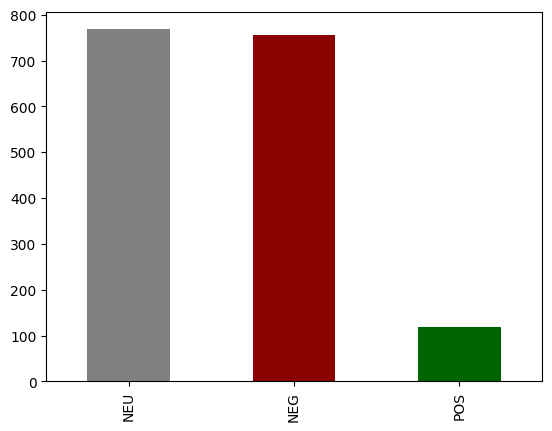

In [ ]:
complete_data["sentiment"].value_counts().plot(kind="bar", color=[colors[x] for x in complete_data["sentiment"].value_counts().index])

A continuación, leemos de argilla los datos que generamos previamente para unificarlos con los datos completos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
datos_generados = rg.load("informes_discriminacion_vacios_generados")

In [ ]:
pd_datos_generados = datos_generados.to_pandas()

In [ ]:
pd_datos_generados

,text,inputs,prediction,prediction_agent,annotation,annotation_agent,vectors,multi_label,explanation,id,metadata,status,event_timestamp,metrics,search_keywords
0,None,"{'resulado_generado': 'Negativo', 'text': 'La ...",None,None,None,None,None,False,None,00092b80-fa0e-4c0c-8b0c-b016a5628d60,{'provincia': 'Estatal'},Default,2023-03-30 15:06:16.648371,{'text_length': 1195},None
1,None,"{'resulado_generado': 'Negativo', 'text': 'Una...",None,None,None,None,None,False,None,006236a9-c3b2-42d9-9a33-3109c1048cab,{'provincia': 'Toledo'},Default,2023-03-31 05:34:51.049785,{'text_length': 1329},None
2,None,"{'resulado_generado': 'Negativo', 'text': 'La ...",None,None,None,None,None,False,None,00e477d5-4ac4-4d47-a80d-458c85eae165,{'provincia': 'Badajoz'},Default,2023-03-30 15:08:47.921807,{'text_length': 795},None
3,None,"{'resulado_generado': 'Positivo', 'text': 'A t...",None,None,None,None,None,False,None,022003e1-1e67-4c83-927d-dc8a5f49d07c,{'provincia': 'Estatal'},Default,2023-03-30 15:07:12.151735,{'text_length': 389},None
4,None,"{'resulado_generado': 'Negativo', 'text': 'Una...",None,None,None,None,None,False,None,02caed63-2265-480d-8750-7d4139c298e4,{'provincia': 'Badajoz'},Default,2023-03-30 15:04:12.546044,{'text_length': 630},None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,None,"{'resulado_generado': 'Negativo', 'text': 'Sei...",None,None,None,None,None,False,None,fd29067c-f73b-4eef-b1c7-2708d84e6deb,{'provincia': 'Zaragoza'},Default,2023-03-31 05:46:50.280050,{'text_length': 1166},None
345,None,"{'resulado_generado': 'Negativo', 'text': 'En ...",None,None,None,None,None,False,None,fd2e2d3a-02a8-401f-8f0e-3bfbed374abe,{'provincia': 'Badajoz'},Default,2023-03-30 15:02:30.444067,{'text_length': 652},None
346,None,"{'resulado_generado': 'Negativo', 'text': 'Una...",None,None,None,None,None,False,None,fe748822-b545-4590-a593-28e10adf72da,{'provincia': 'Huesca'},Default,2023-03-30 15:04:09.027620,{'text_length': 1245},None
347,None,"{'resulado_generado': 'Positivo', 'text': 'La ...",None,None,None,None,None,False,None,fe9ec1fb-5485-4cb7-91ee-5a13c898304b,{'provincia': 'Huesca'},Default,2023-03-31 05:35:56.383958,{'text_length': 1466},None


In [ ]:
features = pd.DataFrame(pd_datos_generados["inputs"].tolist())

In [ ]:
features = features.rename(columns={"text": "hechos", "intervencion_generada":"intervencion", "resulado_generado": "resultado"})

In [ ]:
features

,resultado,hechos,intervencion,tipo_discriminacion
0,Negativo,La Cadena Cuatro Televisión en agosto de 2014 ...,Se envió una carta al programa de televisión s...,Discriminación directa
1,Negativo,Una mujer gitana nos informa de que hace 4 mes...,Se le informa a la mujer de sus derechos como ...,Discriminación directa
2,Negativo,La academia 21 tiene un convenio con el dispos...,Se ha informado a la academia de la situación ...,Discriminación directa
3,Positivo,A través del servicio de alertas llegó este en...,Se ha enviado un mensaje a la página de Facebo...,Discriminación directa
4,Negativo,Una técnica de la FSG en Mérida nos informó qu...,Se informó a la familia de las posibles actuac...,Discriminación directa
...,...,...,...,...
344,Negativo,Seis chicos gitanos estudiantes de uno de los ...,Se informó a los jóvenes de sus derechos como ...,Discriminación directa
345,Negativo,En una sala de espera de una consulta médica e...,Se le informó a la joven de sus derechos como ...,Discriminación directa
346,Negativo,Una técnica de empleo en Huesca nos contó lo s...,Se le informó a la persona responsable del est...,Discriminación directa
347,Positivo,La técnico de intervención social de la FSG re...,Se le informó a la mujer de sus derechos como ...,Discriminación directa


In [ ]:
features["sintetico"] = 1

In [ ]:
features["prob"] = 1

In [ ]:
features["sentiment"] = features["resultado"].apply(lambda x: "POS" if x=="Positivo" else ("NEG" if x=="Negativo" else "NEU"))

In [ ]:
features

,resultado,hechos,intervencion,tipo_discriminacion,sintetico,sentiment,prob
0,Negativo,La Cadena Cuatro Televisión en agosto de 2014 ...,Se envió una carta al programa de televisión s...,Discriminación directa,1,NEG,1
1,Negativo,Una mujer gitana nos informa de que hace 4 mes...,Se le informa a la mujer de sus derechos como ...,Discriminación directa,1,NEG,1
2,Negativo,La academia 21 tiene un convenio con el dispos...,Se ha informado a la academia de la situación ...,Discriminación directa,1,NEG,1
3,Positivo,A través del servicio de alertas llegó este en...,Se ha enviado un mensaje a la página de Facebo...,Discriminación directa,1,POS,1
4,Negativo,Una técnica de la FSG en Mérida nos informó qu...,Se informó a la familia de las posibles actuac...,Discriminación directa,1,NEG,1
...,...,...,...,...,...,...,...
344,Negativo,Seis chicos gitanos estudiantes de uno de los ...,Se informó a los jóvenes de sus derechos como ...,Discriminación directa,1,NEG,1
345,Negativo,En una sala de espera de una consulta médica e...,Se le informó a la joven de sus derechos como ...,Discriminación directa,1,NEG,1
346,Negativo,Una técnica de empleo en Huesca nos contó lo s...,Se le informó a la persona responsable del est...,Discriminación directa,1,NEG,1
347,Positivo,La técnico de intervención social de la FSG re...,Se le informó a la mujer de sus derechos como ...,Discriminación directa,1,POS,1


In [ ]:
originales = complete_data[["hechos", "intervencion", "resultado", "tipo_discriminacion", "sentiment", "prob"]]

In [ ]:
originales["sintetico"] = 0

<ipython-input-79-33b89c7182f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  originales["sintetico"] = 0


In [ ]:
originales

,hechos,intervencion,resultado,tipo_discriminacion,sentiment,prob,sintetico
0,El periódico digital Salamanca24h publicó una ...,"Se envió carta a la dirección del medio, con c...",Negativo. El medio no contestó.,Discriminación directa,NEG,0.507522,0
1,El diario Lanza Digital publicó una noticia en...,Enviamos carta a la directora del diario trasm...,Positivo. Se eliminó la mención a la etnia de ...,Discriminación directa,NEU,0.772065,0
2,El diario ABC de Sevilla publicó una noticia c...,Se mantuvo una conversación telefónica con un ...,Positivo. Se consiguió que rectificaran.,Discriminación directa,POS,0.661231,0
3,En la versión digital del diario Última hora s...,Se envió un correo al medio solicitándole la e...,Negativo. El medio no contestó.,Discriminación directa,NEG,0.507522,0
4,Dos medios de comunicación de Asturias se hici...,Se enviaron cartas a ambos medios solicitando ...,Negativo.,Discriminación directa,NEU,0.549190,0
...,...,...,...,...,...,...,...
3392,Una mujer gitana contactó con un trabajador de...,Desde la FSG entrevistamos a la mujer telefóni...,No se ha obtenido ninguna respuesta por parte ...,Discriminación directa,NEG,0.871719,0
3393,Una mujer gitana fue a ver un piso para alquil...,Desde la FSG se asesoró a la mujer en cuanto a...,La mujer decidió no seguir adelante con la est...,Discriminación directa,NEG,0.845201,0
3394,En las redes sociales se difundió que una fami...,Desde la FSG se contactó con la familia y se c...,No se pudieron llevar a cabo denuncias concret...,Discriminación directa,NEG,0.963536,0
3395,Un hombre gitano quiso contratar los servicios...,Desde la FSG se informó a la víctima sobre sus...,Positivo. La comunidad va a proceder al cambio...,Discriminación directa,NEU,0.853783,0


In [ ]:
all_data = pd.concat([originales, features])

In [ ]:
v_counts = all_data["sentiment"].value_counts()

<Axes: >

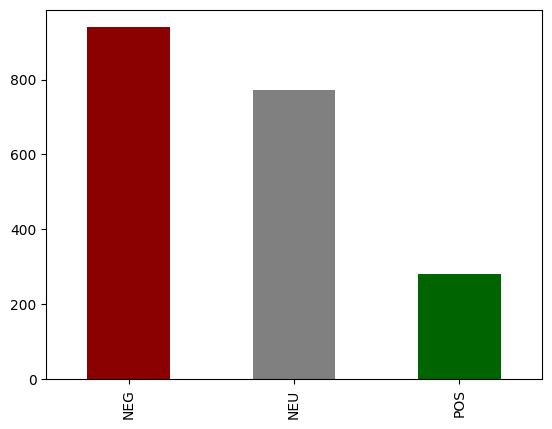

In [ ]:
all_data["sentiment"].value_counts().plot(kind="bar", color=[colors[x] for x in all_data["sentiment"].value_counts().index])

In [ ]:
(v_counts/v_counts.sum())*100

NEG    47.185930
NEU    38.743719
POS    14.070352
Name: sentiment, dtype: float64

In [ ]:
dataset_hf = Dataset.from_pandas(all_data)

In [ ]:
records = []
for i, example in enumerate(dataset_hf):
    record = rg.TextClassificationRecord(
      inputs={"text": example["hechos"], 
              "intervencion": example["intervencion"],
              "resultado": example["resultado"],
              "tipo_discriminacion": example["tipo_discriminacion"],
              "sintetico": example["sintetico"]},
      prediction={(example["sentiment"], example["prob"])}
    )
    
    records.append(record)

# create a dataset in Argilla
rg.log(records, "informes_discriminacion_completo")

Output()

1990 records logged to 
]8;id=489987;https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_completo\https://hackathon-somos-nlp-2023-discriminacion-gitana.hf.space/datasets/team/informes_discriminacion_completo]8;;\

BulkResponse(dataset='informes_discriminacion_completo', processed=1990, failed=0)